***
*Project:* Helmholtz Machine on Niche Construction

*Author:* Jingwei Liu, Computer Music Ph.D., UC San Diego
***

# <span style="background-color:darkorange; color:white; padding:2px 6px">Experiment 4_3</span> 

# Helmholtz Machine Generative Structure


*Created:* December 26, 2023

*Updated:* December 26, 2023

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import utils as ut

In [2]:
structure = [[12,10,8,7,5,4,3,1]]
n_dz = np.array(structure)
n_dz

array([[12, 10,  8,  7,  5,  4,  3,  1]])

In [3]:
value_set = [1,0]
activation_type = "tanh"
bias = [False,False,True] # [instantiation bias, MLP bias,data bias]

In [4]:
para = np.load('self_org_parameters.npy',allow_pickle=True).item()
Phi = para['Phi']
Theta = para['Theta']
dataset = np.load('self_org_dataset.npy')

In [5]:
n = n_dz[0,0]
n_data = dataset.shape[1]
n_layer = n_dz.shape[1]

In [23]:
entire_set = ut.all_comb(n, value_set)
reordered_set = ut.reorder_all_comb(entire_set,dataset)

In [7]:
n_sample = 10000
generation = ut.generate(n_sample,n_dz,value_set,Theta,activation_type,bias)
distribution,data_dist,statistics, MSE, ABS_Error = ut.metrics(generation,reordered_set,dataset)
values_t, counts_t = np.unique(distribution, return_counts=True)
values_d, counts_d  = np.unique(data_dist, return_counts=True)
counts_t = counts_t/n_sample*n_data

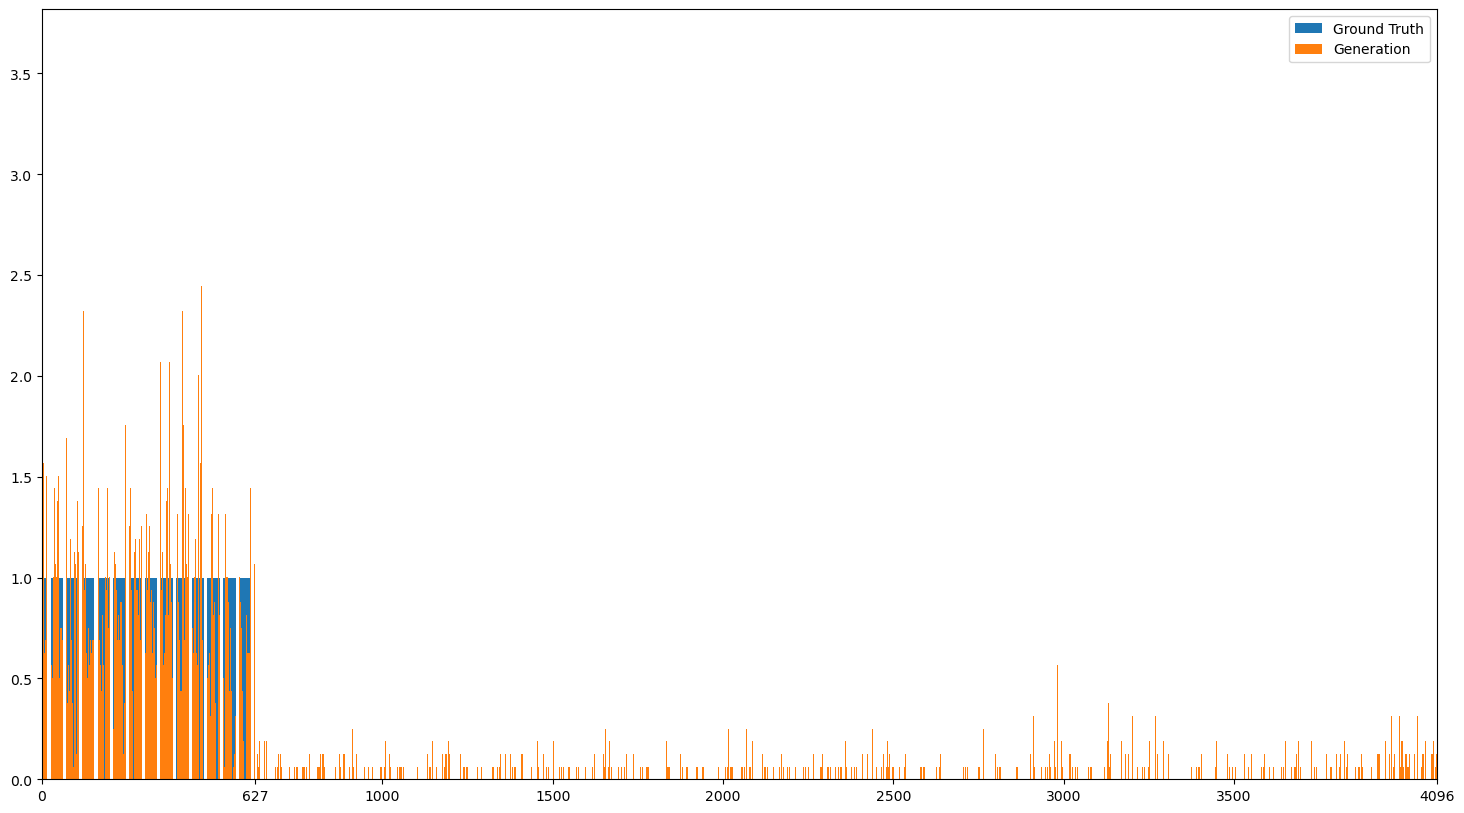

In [8]:
# visualization
x_lim = reordered_set.shape[1]
n_ticks = 8
xtick = np.arange(0,x_lim,int(x_lim/n_ticks/100+0.5)*100)
xtick[np.argmin(np.abs(xtick - values_d.size))] = values_d.size
xtick[-1] = x_lim

fig, ax = plt.subplots(figsize=(18, 10))
ax.bar(values_d,counts_d,label = "Ground Truth")
ax.bar(values_t,counts_t,label = "Generation")
ax.set(xlim=(0, x_lim), xticks=xtick)
plt.legend()

In [9]:
statistics

{'percent': 0.8132,
 'FN': array([ 48,  53, 123, 171, 182, 184, 269, 383, 395, 463, 471, 475, 481,
        493, 494, 508, 513, 515, 516, 549, 555, 560, 562, 564, 565, 567,
        568, 572, 573, 577, 594, 595, 598, 620]),
 'n_fn': 34,
 'FP': array([[ 629,  633,  636, ..., 4092, 4094, 4095],
        [   1,    2,    1, ...,    1,    9,    2]], dtype=int64),
 'n_fp': 1148}

In [10]:
MSE

0.27457391999999997

### Dataset Structure

In [32]:
dataset

array([[0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       ...,
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [33]:
dataset.shape

(12, 627)

In [109]:
# # make data
# # X, Y = np.meshgrid(np.arange(12), np.arange(627))
# Z = np.array([[0,1],[1,0]])

# # plot
# fig, ax = plt.subplots(figsize=(18, 10))
# extent = (0, dataset.shape[1], dataset.shape[0], 0)
# ax.imshow(dataset, aspect='auto', cmap=plt.cm.gray, interpolation='nearest',extent=extent)
# ax.set_xticks(np.arange(dataset.shape[1]))
# ax.set_yticks(np.arange(dataset.shape[0]))
# ax.grid(color='w', linewidth=0.5)
# # ax.set_frame_on(False)
# plt.show()

### Baysian Generative Network

In [12]:
Theta

{'Theta_10': array([[ 1.86682627e+00, -4.00144519e-01, -6.93884331e+00,
         -1.64780816e+00, -2.33423103e+00,  9.47260445e-01,
         -4.52759920e-01, -4.08130068e-01,  1.96244224e+00,
         -1.40769714e+00,  3.47540899e-01],
        [-8.41979039e-01, -2.38412177e-01,  2.46980739e+00,
         -3.51125165e-02, -1.19465039e+00,  7.26780546e-01,
         -8.51386068e-01, -3.04578623e-01, -1.56274204e+00,
         -4.19986505e+00,  3.65749725e-01],
        [-1.19666999e+00, -8.27363601e-02, -2.98689251e+00,
          2.88606059e+00,  1.83955820e-01, -5.05038358e-01,
          9.23255984e-02, -8.26033721e-01, -7.37165961e+00,
         -3.22903370e+00,  2.02819239e+00],
        [-3.94072515e+00, -3.44379257e-01, -5.17381659e-01,
         -4.02235996e+00, -2.99906188e-01,  4.37986727e-01,
          3.18124880e-01,  9.27677213e-01, -3.62324562e+00,
          2.52277585e-01,  4.05261684e+00],
        [ 6.93054333e-01,  1.19284354e+00,  5.51744471e-03,
          1.99422695e-01, -3.065

In [16]:
[*Theta]

['Theta_10',
 'Theta_21',
 'Theta_32',
 'Theta_43',
 'Theta_54',
 'Theta_65',
 'Theta_76']

In [88]:
theta = Theta['Theta_76']

In [89]:
theta

array([[ 1.29947368,  1.29947368],
       [-2.01046231, -2.01046231],
       [ 0.12592413,  0.12592413]])

In [86]:
S = [[1]]

In [90]:
p = ut.sigmoid(np.matmul(Theta['Theta_76'][:,:-1],S))
p

array([[0.78574639],
       [0.11810882],
       [0.5314395 ]])

In [96]:
S = ut.all_comb(3, value_set)
S

array([[1., 0., 1., 0., 1., 0., 1., 0.],
       [1., 1., 0., 0., 1., 1., 0., 0.],
       [1., 1., 1., 1., 0., 0., 0., 0.]])

In [97]:
ut.sigmoid(np.matmul(Theta['Theta_65'][:,:-1],S))

array([[0.00443894, 0.07069826, 0.01958956, 0.2542457 , 0.01290952,
        0.18243784, 0.05536351, 0.5       ],
       [0.03908271, 0.02923631, 0.88071178, 0.84536804, 0.0073847 ,
        0.00547869, 0.57455585, 0.5       ],
       [0.00286598, 0.0010511 , 0.08555462, 0.03311607, 0.0774211 ,
        0.0298053 , 0.7320203 , 0.5       ],
       [0.90049118, 0.60431522, 0.89174786, 0.58163875, 0.86682694,
        0.52347617, 0.85560003, 0.5       ]])

In [98]:
S = ut.all_comb(10, value_set)
S

array([[1., 0., 1., ..., 0., 1., 0.],
       [1., 1., 0., ..., 1., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       ...,
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.]])

In [107]:
app = (ut.sigmoid(np.matmul(Theta['Theta_10'],np.append(S,np.ones((1,2**10)), axis=0))) + 0.5).astype(int)

In [108]:
np.unique(app,axis=1).shape

(12, 249)